# TP MAFFT y HMMER

Primero es necesario tener instalados ambos programas:
- sudo apt-get install mafft
- sudo apt-get install hmmer

In [2]:
!mafft MAFFT-HMM/globin_seed.fasta > MAFFT-HMM/globin_seed_msa.fasta

nthread = 0
nthreadpair = 0
nthreadtb = 0
ppenalty_ex = 0
stacksize: 8192 kb
rescale = 1
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..
    1 / 73
done.

Constructing a UPGMA tree (efffree=0) ... 
   70 / 73
done.

Progressive alignment 1/2... 
STEP    59 / 72 
Reallocating..done. *alloclen = 1275
STEP    72 / 72 
done.

Making a distance matrix from msa.. 
    0 / 73
done.

Constructing a UPGMA tree (efffree=1) ... 
   70 / 73
done.

Progressive alignment 2/2... 
STEP    62 / 72 
Reallocating..done. *alloclen = 1253
STEP    72 / 72 
done.

disttbfast (aa) Version 7.490
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oct).
It tends to insert

In [5]:
!ls MAFFT-HMM/

globin_full_sequences.fasta  globin_seed_msa.fasta  search.out
globin_seed.fasta	     imgs		    seed_modelo.hmm


Una vez realizado el alineamiento multiple, crearemos los Modelos Ocultos de Markov con HMMER

In [7]:
!hmmbuild MAFFT-HMM/seed_modelo.hmm MAFFT-HMM/globin_seed_msa.fasta

# hmmbuild :: profile HMM construction from multiple sequence alignments
# HMMER 3.3.2 (Nov 2020); http://hmmer.org/
# Copyright (C) 2020 Howard Hughes Medical Institute.
# Freely distributed under the BSD open source license.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# input alignment file:             MAFFT-HMM/globin_seed_msa.fasta
# output HMM file:                  MAFFT-HMM/seed_modelo.hmm
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# idx name                  nseq  alen  mlen eff_nseq re/pos description
#---- -------------------- ----- ----- ----- -------- ------ -----------
1     globin_seed_msa         73   156   119     6.45  0.590 

# CPU time: 0.04u 0.00s 00:00:00.04 Elapsed: 00:00:00.04


Analizamos el HMM

In [9]:
!cat MAFFT-HMM/seed_modelo.hmm

HMMER3/f [3.3.2 | Nov 2020]
NAME  globin_seed_msa
LENG  119
ALPH  amino
RF    no
MM    no
CONS  yes
CS    no
MAP   yes
DATE  Sat Oct 12 16:12:03 2024
NSEQ  73
EFFN  6.447205
CKSUM 2946585817
STATS LOCAL MSV       -9.6003  0.71366
STATS LOCAL VITERBI  -10.3977  0.71366
STATS LOCAL FORWARD   -3.7912  0.71366
HMM          A        C        D        E        F        G        H        I        K        L        M        N        P        Q        R        S        T        V        W        Y   
            m->m     m->i     m->d     i->m     i->i     d->m     d->d
  COMPO   2.34005  4.53301  2.94000  2.69360  2.88359  3.08497  3.24592  3.00681  2.56352  2.41391  3.68160  3.10413  3.55992  3.05323  3.08060  2.74271  2.87860  2.70608  4.55417  3.63723
          2.68618  4.42225  2.77519  2.73123  3.46354  2.40513  3.72494  3.29354  2.67741  2.69355  4.24690  2.90347  2.73739  3.18146  2.89801  2.37887  2.77519  2.98518  4.58477  3.61503
          0.00569  5.56818  6.29053  0.61958  0.77255 

In [10]:
!hmmsearch MAFFT-HMM/seed_modelo.hmm MAFFT-HMM/globin_full_sequences.fasta > MAFFT-HMM/search.out

In [19]:
!cat MAFFT-HMM/search.out

>> tr|A0A258ABL1|A0A258ABL1_9BRAD  Uncharacterized protein OS=Bosea sp. 12-68-7 OX=1970324 GN=B7Z40_05070 PE=4 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 ?    9.7   0.0       1.1       2.3       2      44 ..      39      77 ..      38     104 .. 0.75

  Alignments for each domain:
  == domain 1  score: 9.7 bits;  conditional E-value: 1.1
                 globin_seed_msa  2 eilarlFkaypdtkklFkkfkglsaadlksspkfkahgkkvla 44
                                    e++++ +  yp+t+++F+  k+ + a     ++  +h  ++ +
  tr|A0A258ABL1|A0A258ABL1_9BRAD 39 EAFYKQLRRYPETQRFFSSEKQIEGA----QQRQSSHWDRIAK 77
                                    899******************99998....5555555555544 PP

>> tr|A0A258CWQ9|A0A258CWQ9_9BRAD  Uncharacterized protein OS=Bosea sp. 32-68-6 OX=1970325 GN=B7Z14_10855 PE=4 SV=1
   #    score  bias  c-Evalue  i-Evalue hmm

![](/home/agustin/Desktop/Bioinformatica/TPs/MAFFT-HMM/imgs/screen1.png)

In [1]:
from Bio import SearchIO
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
results = list(SearchIO.parse('MAFFT-HMM/search.out', 'hmmer3-text'))

### Obtener el histograma de puntajes de dominio
---
Histograma de puntajes de dominio. El primer objetivo busca Implementar un script en python que grafique un histograma de puntajes de secuencia POR DOMINIO (recuerde, usted le interesa recuperar los dominios globina, no la secuencia entera de cada proteína), a partir de la salida de hmmsearch. Necesitará una librería para graficar cómo matplotlib y la librería de biopython SearchIO, para poder parsear el archivo salida de hmmsearch.

Paso 1: Parsear el archivo de salida de hmmsearch La librería Bio.SearchIO permite leer y procesar la salida de hmmsearch para extraer la información de los dominios.

Paso 2: Extraer los puntajes por dominio Para cada secuencia (hit), iterar sobre los dominios detectados y extraer el score de cada uno de ellos.

Paso 3: Graficar un histograma con matplotlib Una vez obrenidos los puntajes de dominio en una lista, utilizar matplotlib para generar el histograma.

Cada hit corresponde a una secuencia objetivo que coincidió con el perfil HMM.
Cada HSP (High-scoring Segment Pair) dentro de un hit corresponde a un dominio detectado.

In [3]:
def obtain_domain_scores():
    """
    Obtain domain scores from MAFFT-HMM
    
    for each sequence obtains all domain scores in a dictionary.
    
    :return: 
    """
    domains_score = []
    domains_frequency = {}
    for result in results:
        hits = result.hits
        for hit in hits:
            hsps = hit.hsps
            s = {}
            for hsp in hsps:
                if hsp.domain_index not in s:
                    s[hsp.domain_index] = 0
                if hsp.domain_index not in domains_frequency:
                    domains_frequency[hsp.domain_index] = 0
                    
                s[hsp.domain_index] += hsp.bitscore
                domains_frequency[hsp.domain_index] += 1
            domains_score.append(s)
    
    return domains_score, domains_frequency

In [4]:
scores, frequency = obtain_domain_scores()

In [5]:
def plot_domain_frequency():
    domains = list(frequency.keys())
    freq = list(frequency.values())
    
    plt.bar(domains, freq, edgecolor='black')
    plt.title('Frecuencia por Dominio')
    plt.xlabel(f'Dominios')
    plt.ylabel('Frecuencia')
    plt.xticks(domains)
    plt.show()

In [9]:
def plot_domain_scores_of_sequence(sequence = 0):
    s = scores[sequence]
    # Dominios (keys) y sus puntajes (values)
    domains = list(s.keys())
    domain_scores = list(s.values())

    # Crear el gráfico de barras
    plt.bar(domains, domain_scores, edgecolor='black')
    plt.title('Puntajes por Dominio')
    plt.xlabel(f'Dominios de la secuencia {sequence}')
    plt.ylabel('Scores')
    plt.xticks(domains)
    # Mostrar el gráfico
    plt.show()

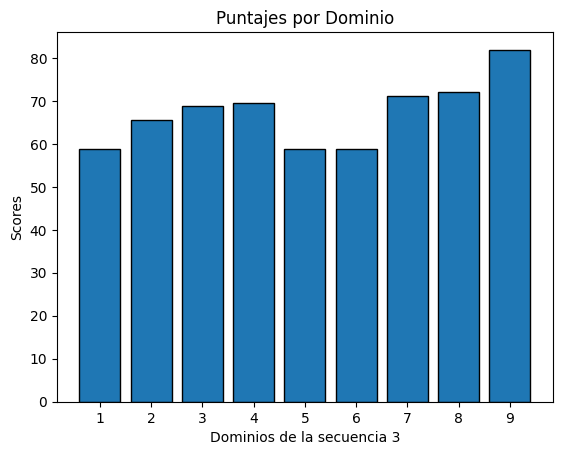

In [10]:
plot_domain_scores_of_sequence(3)

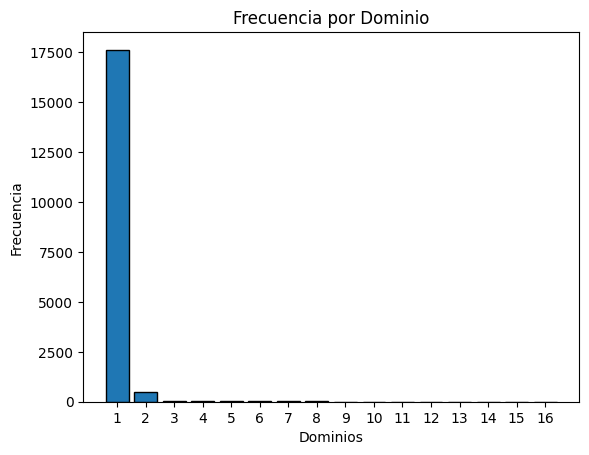

In [93]:
plot_domain_frequency()

Determinación de puntaje de corte y Extracción del archivo de los dominios de interés.

Con el gráfico que hizo mediante su script, establezca (a ojo) un puntaje de corte para recuperar los dominios de secuencia que estén por encima de dicho corte. Recuerde que el puntaje de corte es aquel valor tal que aquellas secuencias que cuando sean contrastadas contra el HMM den un valor superior al valor de corte elegido, serán consideradas como miembros de la familia/dominio/grupo que usted está analizando. => en base a lo que sigue elegí 100 como punto de corte

In [11]:
def obtain_domain_filtered(cutoff_list):
    
    domains_filtered = {cutoff: 0 for cutoff in cutoff_list}
    
    for cutoff in cutoff_list:
        for i in range(len(scores)):
            s = scores[i]
            domain_scores = list(s.values())
            
            for domain in domain_scores:
                if domain >= cutoff:
                    domains_filtered[cutoff] += 1
    
    for cutoff in domains_filtered.keys():
        print(f"Dominios recuperados con puntaje mayor o igual a {cutoff}: {domains_filtered[cutoff]}")
    
    return domains_filtered
            


cutoff_list = [50,75,100]

domains_filtered = obtain_domain_filtered(cutoff_list)

Dominios recuperados con puntaje mayor o igual a 50: 12705
Dominios recuperados con puntaje mayor o igual a 75: 5632
Dominios recuperados con puntaje mayor o igual a 100: 3502


i) Debe ser capaz de obtener los Uniprot IDs y las posiciones de inicio y fin de los dominios y entregar los resultados como lista de listas (o una matriz de numpy o pandas),

ii) Tomar los valores de la lista anterior (IDs y posiciones), y usarlos para cortar las secuencias del registro fasta original.